In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

Data Importing and Pre-processing

In [68]:
# Load the dataset 
data = pd.read_csv('data_science_salaries.csv')
data.head(10)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


In [4]:
# Step 1: Find missing data
data.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [5]:
# Step 2: Check for duplicates and remove if any
data.duplicated().sum()

0

In [26]:
data.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [6]:
# Step 3: Encode categorical variables
categorical_cols = ['job_title', 'experience_level', 'employment_type', 
                    'work_models', 'employee_residence', 
                    'salary_currency', 'company_location', 'company_size']

# Dataset of only United States data
data = data[data['employee_residence'].str.contains('United States')]

# Step 4: Check for outliers in salary_in_usd using the IQR method
q1, q3 = data['salary_in_usd'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove rows with outliers in salary_in_usd
data_cleaned = data[(data['salary_in_usd'] >= lower_bound) & 
                            (data['salary_in_usd'] <= upper_bound)]

In [7]:
# Display summary of cleaned data
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5204 entries, 0 to 6556
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           5204 non-null   object
 1   experience_level    5204 non-null   object
 2   employment_type     5204 non-null   object
 3   work_models         5204 non-null   object
 4   work_year           5204 non-null   int64 
 5   employee_residence  5204 non-null   object
 6   salary              5204 non-null   int64 
 7   salary_currency     5204 non-null   object
 8   salary_in_usd       5204 non-null   int64 
 9   company_location    5204 non-null   object
 10  company_size        5204 non-null   object
dtypes: int64(3), object(8)
memory usage: 487.9+ KB
None
        job_title experience_level employment_type work_models  work_year  \
0   Data Engineer        Mid-level       Full-time      Remote       2024   
1   Data Engineer        Mid-level       Full-time      Remote 

In [8]:
data_cleaned['experience_level'].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

In [9]:
data_cleaned.describe()

,work_year,salary,salary_in_usd
count,5204.000000,5204.000000,5204.000000
mean,2022.888163,153211.435050,153220.955419
std,0.590284,57568.049715,57552.569690
min,2020.000000,24000.000000,24000.000000
25%,2023.000000,110000.000000,110000.000000
50%,2023.000000,147000.000000,147000.000000
75%,2023.000000,190000.000000,190000.000000
max,2024.000000,318300.000000,318300.000000


Data Analysis and Visualization

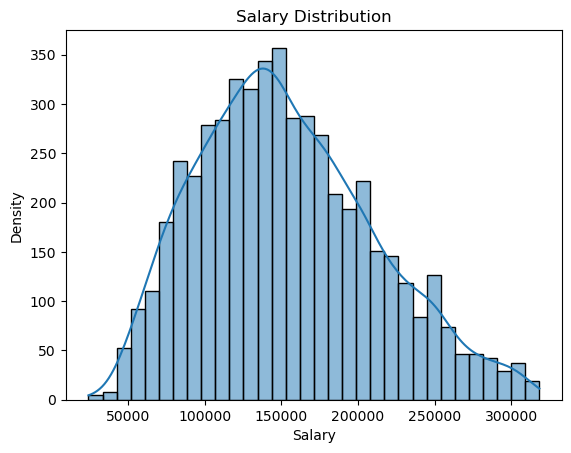

In [10]:
sns.histplot(data_cleaned['salary_in_usd'], kde=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution')
plt.show()

In [11]:
# Bin salary_in_usd into 4 categories
num_bins = 4
labels = ['Low', 'Medium', 'High', 'Very High']
data_cleaned['salary_binned'] = pd.qcut(data_cleaned['salary_in_usd'], q=num_bins, labels=labels)

/var/folders/6j/qtnqw_nn0bj948l89lgcc38m0000gn/T/ipykernel_77256/52521721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['salary_binned'] = pd.qcut(data_cleaned['salary_in_usd'], q=num_bins, labels=labels)


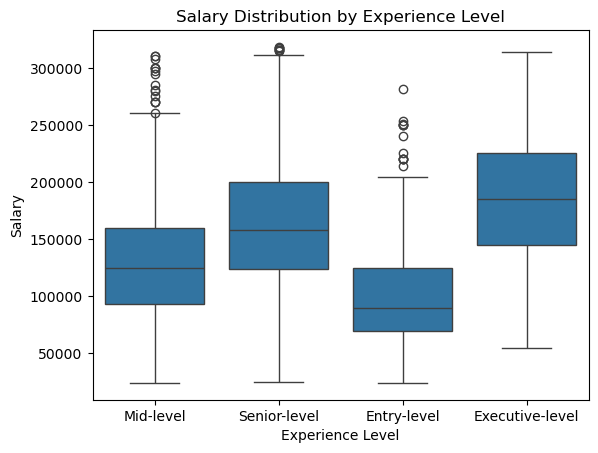

In [12]:
# Salary distribution across experience level
sns.boxplot(x='experience_level', y='salary_in_usd', data=data_cleaned)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Salary Distribution by Experience Level')
plt.show()

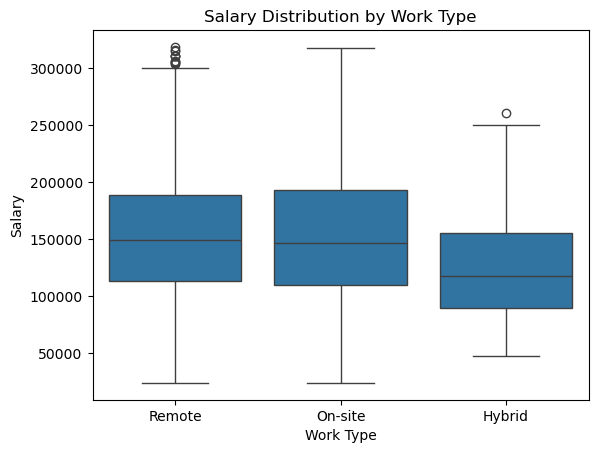

In [13]:
# Salary distribution across work type
sns.boxplot(x='work_models', y='salary_in_usd', data=data_cleaned)
plt.xlabel('Work Type')
plt.ylabel('Salary')
plt.title('Salary Distribution by Work Type')
plt.show()

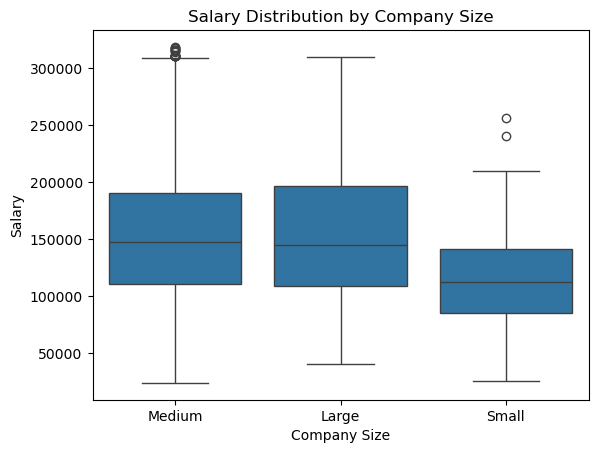

In [14]:
# Salary distribution across company size
sns.boxplot(x='company_size', y='salary_in_usd', data=data_cleaned)
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.title('Salary Distribution by Company Size')
plt.show()

In [15]:
interaction_effects = data_cleaned.groupby(['work_models', 'company_size'])['salary_in_usd'].mean().reset_index()

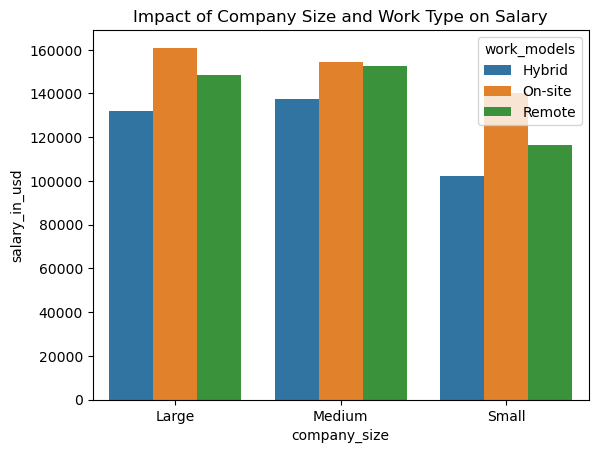

In [16]:
# Bar plot to visualize company size and work type on salary
sns.barplot(data=interaction_effects, x='company_size', y='salary_in_usd', hue='work_models')
plt.title("Impact of Company Size and Work Type on Salary")
plt.show()

In [17]:
interaction_effects2 = data_cleaned.groupby(['work_models', 'experience_level'])['salary_in_usd'].mean().reset_index()

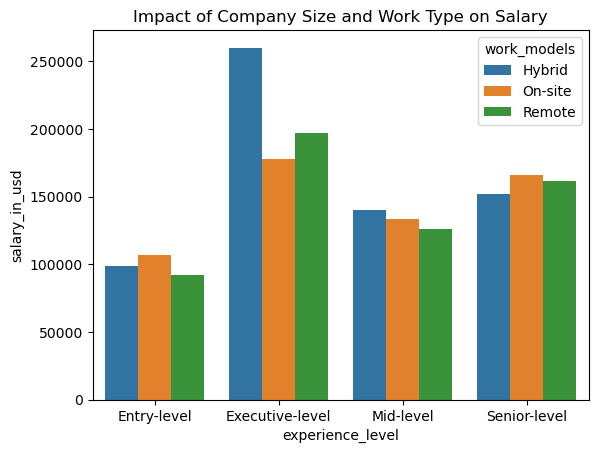

In [18]:
# Bar plot to visualize experience level and work type on salary
sns.barplot(data=interaction_effects2, x='experience_level', y='salary_in_usd', hue='work_models')
plt.title("Impact of Company Size and Work Type on Salary")
plt.show()